In [2]:
import pandas as pd

data = pd.read_csv("online retail.csv", encoding='latin1')


In [3]:
data.head()

,InvoiceNo,Products,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 7)

In [5]:
data.dtypes

InvoiceNo       object
Products        object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   Products     540455 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [7]:
data.sample(5)

,InvoiceNo,Products,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
223567,556484,BLUE FLY SWAT,3,6/12/2011 13:17,0.65,16938.0,United Kingdom
24774,538349,PINK FAIRY CAKE CHILDRENS APRON,2,12/10/2010 14:59,4.21,NaN,United Kingdom
485711,577618,ROSES REGENCY TEACUP AND SAUCER,6,11/21/2011 10:27,2.95,12795.0,Portugal
80318,543036,PINK LOVE HEART SHAPE CUP,6,2/2/2011 15:57,0.85,17223.0,United Kingdom
232958,557397,TRAVEL CARD WALLET VINTAGE TICKET,1,6/20/2011 11:23,0.42,17897.0,United Kingdom


In [8]:
# 1. Drop rows where Product name or CustomerID is missing
data = data.dropna(subset=['Products', 'CustomerID'])

In [9]:
# 2. Remove rows where Quantity or UnitPrice are zero or negative
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [10]:
data['CustomerID'] = data['CustomerID'].astype(str)

In [11]:
# 4. Convert InvoiceDate to proper datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

In [12]:
# 5. Remove any rows where date failed to convert
data = data.dropna(subset=['InvoiceDate'])

In [13]:
# 6. Drop exact duplicate rows (where all columns match)
data = data.drop_duplicates()

In [14]:
# 7. Check shape after cleaning
print("Shape after cleaning:", data.shape)

Shape after cleaning: (392657, 7)


In [15]:
# 1. Check again for null values
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 InvoiceNo      0
Products       0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [18]:
# 2. Confirm all quantities and prices are positive
print("\nQuantity <= 0:", (data['Quantity'] <= 0).sum())
print("UnitPrice <= 0:", (data['UnitPrice'] <= 0).sum())


Quantity <= 0: 0
UnitPrice <= 0: 0


In [16]:
# 3. Verify data types again
print("\nData Types:\n", data.dtypes)


Data Types:
 InvoiceNo              object
Products               object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object


In [17]:
# 4. Check date range — helps detect weird future/past dates
print("\nDate Range:", data['InvoiceDate'].min(), "→", data['InvoiceDate'].max())


Date Range: 2010-12-01 08:26:00 → 2011-12-09 12:50:00


In [18]:
# 5. Peek at a few cleaned rows
data.sample(5)

,InvoiceNo,Products,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
514996,579768,BOX OF 6 CHRISTMAS CAKE DECORATIONS,8,2011-11-30 15:08:00,3.75,14911.0,EIRE
499034,578551,WHITE BROCANTE SOAP DISH,2,2011-11-24 15:05:00,2.95,12937.0,United Kingdom
212981,555515,IVORY KITCHEN SCALES,1,2011-06-05 10:47:00,8.50,17690.0,United Kingdom
8622,537140,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-05 12:53:00,2.10,12748.0,United Kingdom
487609,577773,PANTRY WASHING UP BRUSH,6,2011-11-21 15:57:00,1.45,16712.0,United Kingdom


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
print("✅ Seaborn is working fine!")

✅ Seaborn is working fine!


In [20]:
# Step 2.3 — Outlier Detection

# 1. Summary statistics for numeric columns
print("Summary Statistics:\n")
print(data[['Quantity', 'UnitPrice']].describe())

Summary Statistics:

            Quantity      UnitPrice
count  392657.000000  392657.000000
mean       13.120143       3.126100
std       180.500842      22.242818
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000


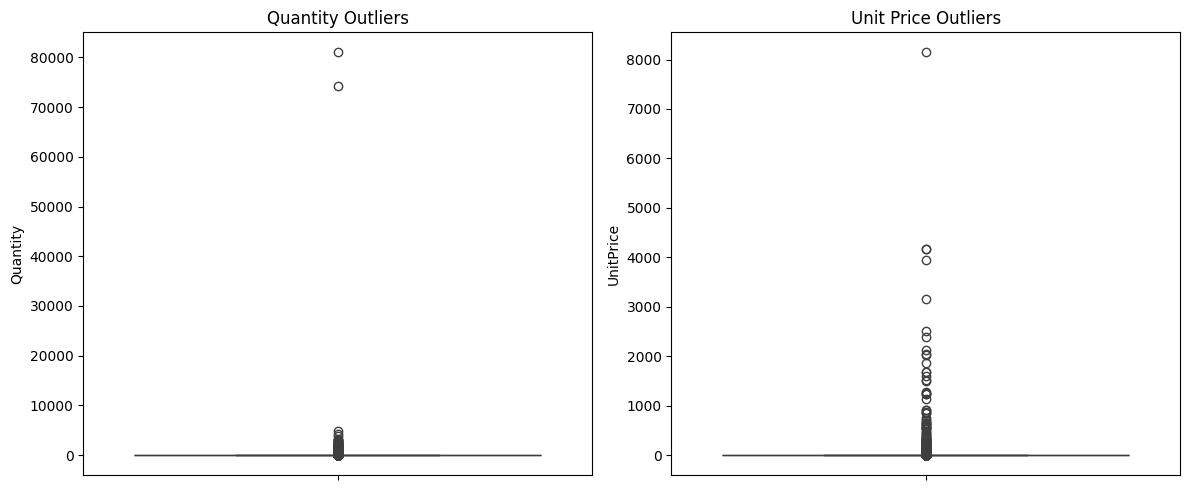

In [21]:
# 2. Visualize outliers with boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y='Quantity', data=data, ax=axes[0])
axes[0].set_title('Quantity Outliers')

sns.boxplot(y='UnitPrice', data=data, ax=axes[1])
axes[1].set_title('Unit Price Outliers')

plt.tight_layout()
plt.show()


In [22]:
import pandas as pd

# Ensure columns exist
print(data.columns)  # check column names

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Drop rows with missing CustomerID or InvoiceDate
data = data.dropna(subset=['CustomerID','InvoiceDate'])

# Calculate TotalSpend
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']

# Use correct invoice column, if yours is named differently replace 'InvoiceNo'
invoice_col = 'InvoiceNo' if 'InvoiceNo' in data.columns else data.columns[0]  # fallback

# Snapshot date
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Aggregate RFM
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    invoice_col: 'count',                                     # Frequency
    'TotalSpend': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID','Recency','Frequency','Monetary']

rfm.head()



Index(['InvoiceNo', 'Products', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [23]:
# Drop rows with missing CustomerID first
rfm = rfm.dropna(subset=['CustomerID'])

# Convert CustomerID to integer safely, then to string with prefix
rfm['CustomerID'] = rfm['CustomerID'].apply(lambda x: f'CUST_{int(float(x))}')

rfm.head()



,CustomerID,Recency,Frequency,Monetary
0,CUST_12346,326,1,77183.60
1,CUST_12347,2,182,4310.00
2,CUST_12348,75,31,1797.24
3,CUST_12349,19,73,1757.55
4,CUST_12350,310,17,334.40


In [24]:
# Function to cap outliers
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return series.clip(upper=Q3 + 1.5*IQR)

# Cap Recency, Frequency, Monetary
rfm['Recency'] = cap_outliers(rfm['Recency'])
rfm['Frequency'] = cap_outliers(rfm['Frequency'])
rfm['Monetary'] = cap_outliers(rfm['Monetary'])

rfm.describe()


,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,91.447441,67.988820,1158.987122
std,97.199547,67.265813,1146.770122
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.482500
50%,51.000000,41.000000,668.570000
75%,142.000000,98.000000,1660.597500
max,328.000000,219.500000,3691.770000


In [25]:
from sklearn.preprocessing import StandardScaler

# Select RFM columns
rfm_features = rfm[['Recency','Frequency','Monetary']]

# Initialize scaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Convert back to DataFrame
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency','Frequency','Monetary'])
rfm_scaled['CustomerID'] = rfm['CustomerID'].values

rfm_scaled.head()


,Recency,Frequency,Monetary,CustomerID
0,2.413382,-0.995997,2.208878,CUST_12346
1,-0.920352,1.695130,2.208878,CUST_12347
2,-0.169233,-0.549954,0.556630,CUST_12348
3,-0.745433,0.074507,0.522016,CUST_12349
4,2.248753,-0.758107,-0.719135,CUST_12350


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>, <Axes: >]], dtype=object)

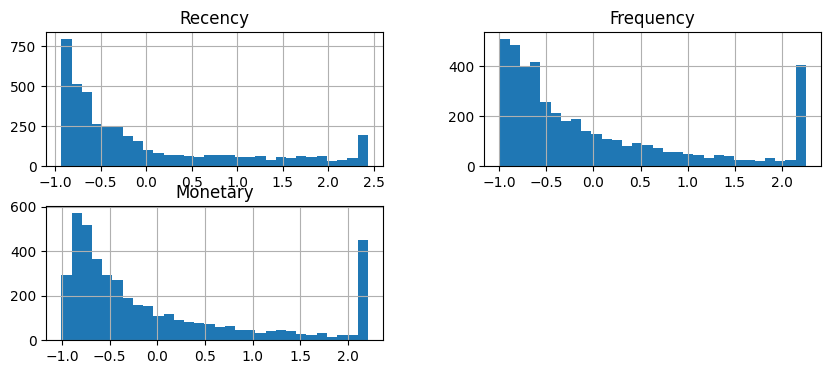

In [26]:
#confirming 
# 1. Summary statistics of scaled features
rfm_scaled[['Recency','Frequency','Monetary']].describe()

# 2. Check for any extreme values
rfm_scaled[['Recency','Frequency','Monetary']].max()
rfm_scaled[['Recency','Frequency','Monetary']].min()

# 3. Optional: histogram
rfm_scaled[['Recency','Frequency','Monetary']].hist(bins=30, figsize=(10,4))


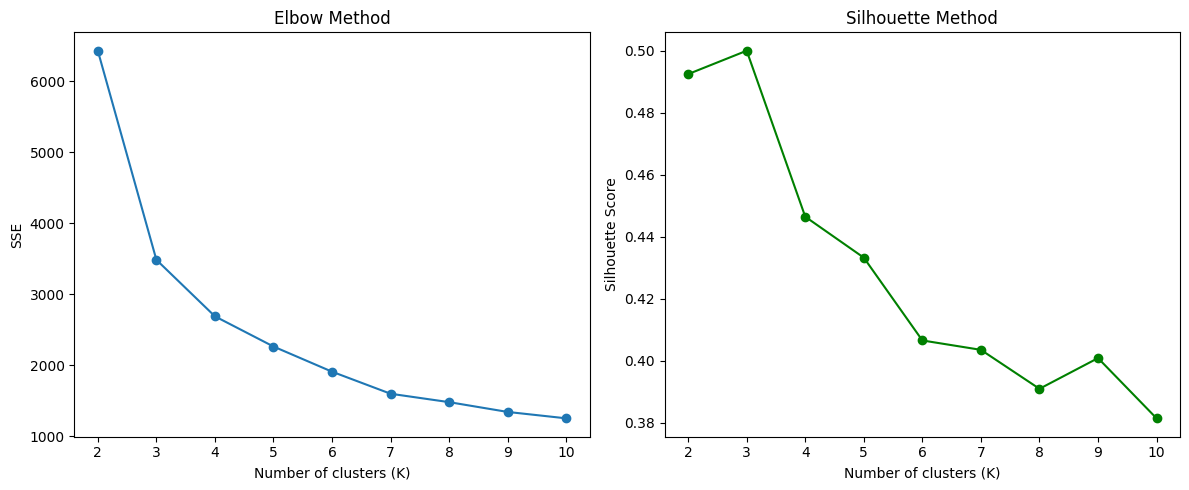

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select only scaled features
X = rfm_scaled[['Recency','Frequency','Monetary']]

sse = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)                    # Sum of squared distances
    silhouette.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow Method and Silhouette Score
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K_range, silhouette, marker='o', color='green')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()


In [28]:
from sklearn.cluster import KMeans

# Select features
X = rfm_scaled[['Recency','Frequency','Monetary']]

# Fit K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_scaled['Cluster'] = kmeans.fit_predict(X)

# Merge cluster labels back to original RFM data
rfm['Cluster'] = rfm_scaled['Cluster']

# Preview
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Cluster
0,CUST_12346,326,1.0,3691.77,2
1,CUST_12347,2,182.0,3691.77,1
2,CUST_12348,75,31.0,1797.24,3
3,CUST_12349,19,73.0,1757.55,3
4,CUST_12350,310,17.0,334.40,2


In [29]:
# Cluster-level RFM summary
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'CustomerID':'count'  # number of customers per cluster
}).round(2).reset_index()

cluster_summary.rename(columns={'CustomerID':'NumCustomers'}, inplace=True)
print(cluster_summary)


   Cluster  Recency  Frequency  Monetary  NumCustomers
0        0    52.87      30.54    520.78          1770
1        1    23.54     193.62   3195.34           683
2        2   248.44      23.75    406.85          1005
3        3    42.46      96.32   1721.14           880


In [30]:
# Define cluster labels
cluster_labels = {
    0: 'Potential / Regular Customers',
    1: 'Best / VIP Customers',
    2: 'At-Risk / Lost Customers',
    3: 'Loyal Customers'
}

# Map labels
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

# View labeled summary
labeled_summary = rfm.groupby(['Cluster', 'Segment']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).round(2).reset_index().rename(columns={'CustomerID': 'NumCustomers'})

print(labeled_summary)


   Cluster                        Segment  Recency  Frequency  Monetary  \
0        0  Potential / Regular Customers    52.87      30.54    520.78   
1        1           Best / VIP Customers    23.54     193.62   3195.34   
2        2       At-Risk / Lost Customers   248.44      23.75    406.85   
3        3                Loyal Customers    42.46      96.32   1721.14   

   NumCustomers  
0          1770  
1           683  
2          1005  
3           880  


In [31]:
# Percentage of customers in each segment
segment_distribution = (
    rfm['Segment']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={'index': 'Segment', 'Segment': 'Percentage'})
)

print(segment_distribution)


                      Percentage  proportion
0  Potential / Regular Customers       40.80
1       At-Risk / Lost Customers       23.17
2                Loyal Customers       20.29
3           Best / VIP Customers       15.74


In [32]:
# Revenue contribution per segment
revenue_contribution = (
    rfm.groupby('Segment')['Monetary']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Calculate percentage share
total_revenue = revenue_contribution['Monetary'].sum()
revenue_contribution['Revenue%'] = (
    revenue_contribution['Monetary'] / total_revenue * 100
).round(2)

print(revenue_contribution)


                         Segment     Monetary  Revenue%
0           Best / VIP Customers  2182417.941     43.41
1                Loyal Customers  1514606.320     30.13
2  Potential / Regular Customers   921779.393     18.33
3       At-Risk / Lost Customers   408882.480      8.13


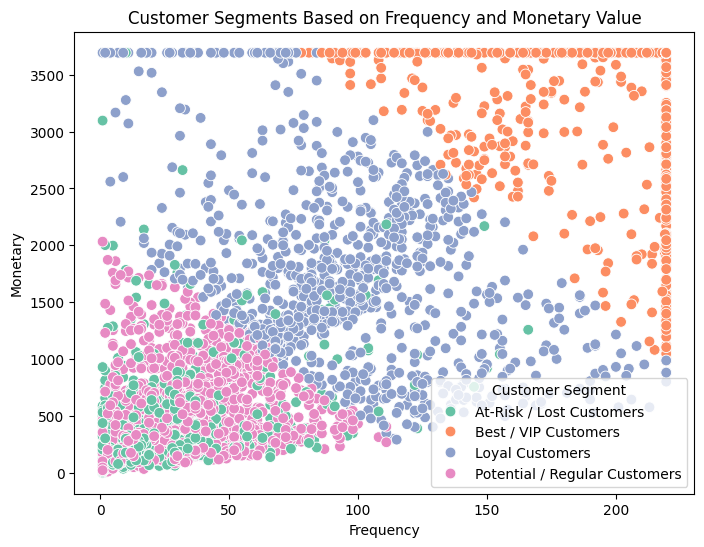

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2D visualization using Frequency vs Monetary (colored by Cluster)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm,
    x='Frequency',
    y='Monetary',
    hue='Segment',
    palette='Set2',
    s=60
)
plt.title('Customer Segments Based on Frequency and Monetary Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Customer Segment')
plt.show()


In [34]:
# Segment profiling
segment_actions = {
    'Best / VIP Customers': 'Reward loyalty, offer early access & premium perks.',
    'Loyal Customers': 'Upsell and cross-sell, build community programs.',
    'Potential / Regular Customers': 'Send personalized offers to increase frequency.',
    'At-Risk / Lost Customers': 'Reactivation campaigns with discounts or reminders.'
}

rfm['Recommended_Action'] = rfm['Segment'].map(segment_actions)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Cluster,Segment,Recommended_Action
0,CUST_12346,326,1.0,3691.77,2,At-Risk / Lost Customers,Reactivation campaigns with discounts or remin...
1,CUST_12347,2,182.0,3691.77,1,Best / VIP Customers,"Reward loyalty, offer early access & premium p..."
2,CUST_12348,75,31.0,1797.24,3,Loyal Customers,"Upsell and cross-sell, build community programs."
3,CUST_12349,19,73.0,1757.55,3,Loyal Customers,"Upsell and cross-sell, build community programs."
4,CUST_12350,310,17.0,334.40,2,At-Risk / Lost Customers,Reactivation campaigns with discounts or remin...


In [35]:
# Combine all insights: size, revenue share, and action plan
final_summary = (
    rfm.groupby('Segment')
    .agg({
        'CustomerID': 'count',
        'Monetary': 'sum'
    })
    .rename(columns={'CustomerID': 'NumCustomers', 'Monetary': 'TotalRevenue'})
    .reset_index()
)

# Add percentage columns
final_summary['Customer%'] = (
    final_summary['NumCustomers'] / final_summary['NumCustomers'].sum() * 100
).round(2)
final_summary['Revenue%'] = (
    final_summary['TotalRevenue'] / final_summary['TotalRevenue'].sum() * 100
).round(2)

# Add strategic action
final_summary['Recommended_Action'] = final_summary['Segment'].map({
    'Best / VIP Customers': 'Reward & retain with exclusives.',
    'Loyal Customers': 'Encourage referrals & upsell.',
    'Potential / Regular Customers': 'Target with offers to increase spend.',
    'At-Risk / Lost Customers': 'Re-engage with win-back campaigns.'
})

print(final_summary)


                         Segment  NumCustomers  TotalRevenue  Customer%  \
0       At-Risk / Lost Customers          1005    408882.480      23.17   
1           Best / VIP Customers           683   2182417.941      15.74   
2                Loyal Customers           880   1514606.320      20.29   
3  Potential / Regular Customers          1770    921779.393      40.80   

   Revenue%                     Recommended_Action  
0      8.13     Re-engage with win-back campaigns.  
1     43.41       Reward & retain with exclusives.  
2     30.13          Encourage referrals & upsell.  
3     18.33  Target with offers to increase spend.  


In [36]:
# 1️⃣ Export the detailed customer-level data
rfm.to_csv("customer_segmentation_detailed.csv", index=False)

# 2️⃣ Export the summary table for dashboard visuals
final_summary.to_csv("customer_segmentation_summary.csv", index=False)

print("✅ CSV files created successfully:")
print("- customer_segmentation_detailed.csv")
print("- customer_segmentation_summary.csv")


✅ CSV files created successfully:
- customer_segmentation_detailed.csv
- customer_segmentation_summary.csv
